In [15]:
# This notebook is linked to the AWSubduction_FraWSC-DHflx.ipynb one 
# It only makes the last part of scatter correlation plots 

In [16]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy
import scipy.stats

%matplotlib inline

In [17]:
def pval_test(rpval,rtresh):
    # The p-value output by the scipy.stats.pearsonr function is to interpreted as follow:
    # It corresponds to the probability to make an error if we reject the H0 hypothesis (or null hypothesis)
    # This function just set a color to either green or red to set a correlation significance
    
    col_val='g' # green color stands for Ok, significative corelation
    if rpval > rtresh : col_val='r'  
    
    return col_val

In [18]:
s_year=1980 ; e_year=2015
#s_year=1960 ; e_year=1995

RYEAR=str(s_year)+'-'+str(e_year)

In [19]:
# List of GS± experiments names:
case_Ref='BCTGE27NTMX'   #; case_Ref='BVHNTMXP'  ;  case_Ref='BVHNTMXD'  ;  case_Ref='BCTGE27NTMX'  

ralpha=0.05 # Treshold I would like to repect, or confidence 5% 


In [20]:
ds_read=xr.Dataset()
ds_read=xr.open_dataset('NETCDF/BOX-LargeFraWSC/'+case_Ref+'_y'+RYEAR+'_Full_LargeFraWSC_TiSe_Quant.nc')

In [21]:
ds_read

<xarray.Dataset>
Dimensions:                      (time: 432)
Coordinates:
  * time                         (time) datetime64[ns] 1980-01-31 ... 2015-12-31
Data variables:
    Ref_Qt_FraWSC_meanTiSe       (time) float64 ...
    Ref_AWTmax_FraWSC_meanTiSe   (time) float64 ...
    Ref_Icearea_FraWSC_meanTiSe  (time) float64 ...
    Ref_massflx_TiSe_nFraWSC     (time) float64 ...
    Ref_SS_FraWSC_Hflx_TiSe      (time) float64 ...
    Ref_NS_FraWSC_Hflx_TiSe      (time) float64 ...
    Ref_XS_FraWSC_Hflx_TiSe      (time) float64 ...
    Ref_SS_FraWSC_Vol_TiSe       (time) float64 ...
    Ref_NS_FraWSC_Vol_TiSe       (time) float64 ...
    Ref_XS_FraWSC_Vol_TiSe       (time) float64 ...
    Ref_FraWSC_S-N_Hflx_ano      (time) float64 ...
    Ref_FraWSC_S-X_Hflx_ano      (time) float64 ...

In [22]:
ds_read_add=xr.Dataset()
ds_read_add=xr.open_dataset('./NETCDF/BOX-LargeFraWSC/'+case_Ref+'_y'+RYEAR+'_TiSe_NetHeatQt_LargeFraWSC.nc')
ds_read['Ref_Qtdxdy_FraWSC_meanTiSe']=ds_read_add['Ref_Qtdxdy_FraWSC_meanTiSe']

In [23]:
# Read the mean temperature through the extreme north section computed for T >0°C
ds_read_add=xr.Dataset()
ds_read_add=xr.open_dataset('./NETCDF/BOX-LargeFraWSC/'+case_Ref+'_y'+RYEAR+'_LargeFraWSC_XSec_TMeanTiSe.nc')
ds_read['Ref_XS_FraWSC_Tmsk_mean']=ds_read_add['Ref_XS_FraWSC_Tmsk_mean']

In [24]:
ds_read

<xarray.Dataset>
Dimensions:                      (time: 432, time_counter: 432)
Coordinates:
  * time                         (time) datetime64[ns] 1980-01-31 ... 2015-12-31
Dimensions without coordinates: time_counter
Data variables:
    Ref_Qt_FraWSC_meanTiSe       (time) float64 ...
    Ref_AWTmax_FraWSC_meanTiSe   (time) float64 ...
    Ref_Icearea_FraWSC_meanTiSe  (time) float64 ...
    Ref_massflx_TiSe_nFraWSC     (time) float64 ...
    Ref_SS_FraWSC_Hflx_TiSe      (time) float64 ...
    Ref_NS_FraWSC_Hflx_TiSe      (time) float64 ...
    Ref_XS_FraWSC_Hflx_TiSe      (time) float64 ...
    Ref_SS_FraWSC_Vol_TiSe       (time) float64 ...
    Ref_NS_FraWSC_Vol_TiSe       (time) float64 ...
    Ref_XS_FraWSC_Vol_TiSe       (time) float64 ...
    Ref_FraWSC_S-N_Hflx_ano      (time) float64 ...
    Ref_FraWSC_S-X_Hflx_ano      (time) float64 ...
    Ref_Qtdxdy_FraWSC_meanTiSe   (time) float64 ...
    Ref_XS_FraWSC_Tmsk_mean      (time_counter) float64 ...

In [53]:
DHflx_QSurnet_Cor=np.corrcoef(ds_read['Ref_FraWSC_S-X_Hflx_ano'],ds_read['Ref_Qt_FraWSC_meanTiSe'])
DHflx_IceArea_Cor=np.corrcoef(ds_read['Ref_FraWSC_S-X_Hflx_ano'],ds_read['Ref_Icearea_FraWSC_meanTiSe'])
DHflx_AWTmax_Cor=np.corrcoef(ds_read['Ref_FraWSC_S-X_Hflx_ano'],ds_read['Ref_AWTmax_FraWSC_meanTiSe'])
DHflx_IceMflx_Cor=np.corrcoef(ds_read['Ref_FraWSC_S-X_Hflx_ano'],ds_read['Ref_massflx_TiSe_nFraWSC'])

# The follwing correlation computation is just another way to get correlation, but it gives also the p-value
DHflx_QSurnet_CorSci=scipy.stats.pearsonr(ds_read['Ref_FraWSC_S-X_Hflx_ano'],ds_read['Ref_Qt_FraWSC_meanTiSe'])
DHflx_IceArea_CorSci=scipy.stats.pearsonr(ds_read['Ref_FraWSC_S-X_Hflx_ano'],ds_read['Ref_Icearea_FraWSC_meanTiSe'])
DHflx_AWTmax_CorSci=scipy.stats.pearsonr(ds_read['Ref_FraWSC_S-X_Hflx_ano'],ds_read['Ref_AWTmax_FraWSC_meanTiSe'])
DHflx_IceMflx_CorSci=scipy.stats.pearsonr(ds_read['Ref_FraWSC_S-X_Hflx_ano'],ds_read['Ref_massflx_TiSe_nFraWSC'])

print 'DHflx_QSurnet_CorSci Corr | p-val:', np.round(DHflx_QSurnet_CorSci[0],2),' | ', np.round(DHflx_QSurnet_CorSci[1],4)
print 'DHflx_IceArea_CorSci Corr | p-val:', np.round(DHflx_IceArea_CorSci[0],2),' | ', np.round(DHflx_IceArea_CorSci[1],4)
print 'DHflx_AWTmax_CorSci  Corr | p-val:', np.round(DHflx_AWTmax_CorSci[0],2) ,' | ', np.round(DHflx_AWTmax_CorSci[1],4)
print 'DHflx_IceMflx_CorSci Corr | p-val:', np.round(DHflx_IceMflx_CorSci[0],2),' | ', np.round(DHflx_IceMflx_CorSci[1],4)

# Compute Correlations between the AWTmax variable and others quantities
DAWTmax_Qt_Cor=np.corrcoef(ds_read['Ref_AWTmax_FraWSC_meanTiSe'],ds_read['Ref_Qt_FraWSC_meanTiSe'])
DAWTmax_IceArea_Cor=np.corrcoef(ds_read['Ref_AWTmax_FraWSC_meanTiSe'],ds_read['Ref_Icearea_FraWSC_meanTiSe'])

DAWTmax_Qt_CorSci=scipy.stats.pearsonr(ds_read['Ref_AWTmax_FraWSC_meanTiSe'],ds_read['Ref_Qt_FraWSC_meanTiSe'])
DAWTmax_IceArea_CorSci=scipy.stats.pearsonr(ds_read['Ref_AWTmax_FraWSC_meanTiSe'],ds_read['Ref_Icearea_FraWSC_meanTiSe'])

print
print 'DAWTmax_Qt_CorSci  Corr | p-val:', np.round(DAWTmax_Qt_CorSci[0],2) ,' | ', np.round(DAWTmax_Qt_CorSci[1],4)
print 'DAWTmax_IceArea_CorSci Corr | p-val:', np.round(DAWTmax_IceArea_CorSci[0],2),' | ', np.round(DAWTmax_IceArea_CorSci[1],4)




DHflx_QSurnet_CorSci Corr | p-val: -0.26  |  0.0
DHflx_IceArea_CorSci Corr | p-val: -0.14  |  0.0026
DHflx_AWTmax_CorSci  Corr | p-val: 0.04  |  0.4171
DHflx_IceMflx_CorSci Corr | p-val: -0.04  |  0.4355

DAWTmax_Qt_CorSci  Corr | p-val: 0.42  |  0.0
DAWTmax_IceArea_CorSci Corr | p-val: -0.72  |  0.0


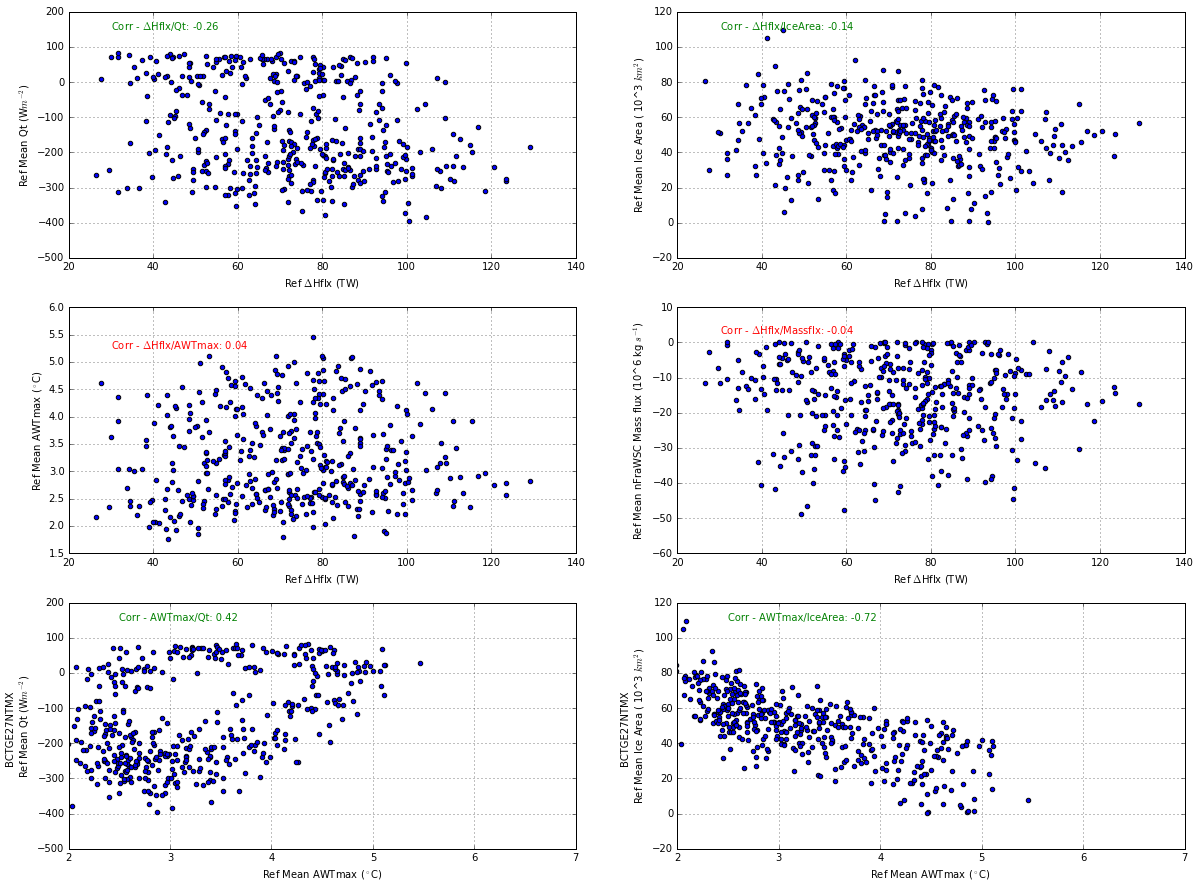

In [54]:
# Scatter plot between ∆Hflx and QSurnet
plt.figure(figsize=(20,15))

if case_Ref == 'BVHNTMXP' : 
    xtext=10.
        
if case_Ref == 'BVHNTMXD' : 
    xtext=10.

if case_Ref == 'BCTGE27NTMX' : 
    xtext=30.
        

plt.subplot(321) 
plt.scatter(ds_read['Ref_FraWSC_S-X_Hflx_ano'],ds_read['Ref_Qt_FraWSC_meanTiSe'])
plt.xlabel(r'Ref $\Delta$Hflx (TW)')
plt.ylabel(r'Ref Mean Qt (W$m^{-2}$)')
plt.text(xtext,150.,r'Corr - $\Delta$Hflx/Qt: '+str(np.round(DHflx_QSurnet_Cor[1][0],2)),color=pval_test(DHflx_QSurnet_CorSci[1],ralpha))
plt.grid(True)

# Scatter plot between ∆Hflx and Icearea
plt.subplot(322) 
plt.scatter(ds_read['Ref_FraWSC_S-X_Hflx_ano'],ds_read['Ref_Icearea_FraWSC_meanTiSe'])
plt.xlabel(r'Ref $\Delta$Hflx (TW)')
plt.ylabel(r'Ref Mean Ice Area ( 10^3 $km^{2}$)')
if case_Ref == 'BVHNTMXD' :     ytext=130.
if case_Ref == 'BVHNTMXP' :     ytext=110.
if case_Ref == 'BCTGE27NTMX' :     ytext=110.
    

plt.text(xtext,ytext,r'Corr - $\Delta$Hflx/IceArea: '+str(np.round(DHflx_IceArea_Cor[1][0],2)),color=pval_test(DHflx_IceArea_CorSci[1],ralpha))
plt.grid(True)

# Scatter plot between ∆Hflx and AWTmax
plt.subplot(323) 
plt.scatter(ds_read['Ref_FraWSC_S-X_Hflx_ano'],ds_read['Ref_AWTmax_FraWSC_meanTiSe'])
plt.xlabel(r'Ref $\Delta$Hflx (TW)')
plt.ylabel(r'Ref Mean AWTmax ($^\circ$C)')
if case_Ref == 'BVHNTMXP' :     ytext=5.25
if case_Ref == 'BVHNTMXD' :     ytext=5.7
if case_Ref == 'BCTGE27NTMX' :     ytext=5.25

    
plt.text(xtext,ytext,r'Corr - $\Delta$Hflx/AWTmax: '+str(np.round(DHflx_AWTmax_Cor[1][0],2)),color=pval_test(DHflx_AWTmax_CorSci[1],ralpha))
plt.grid(True)

# Scatter plot between ∆Hflx and Massflux
plt.subplot(324) 
plt.scatter(ds_read['Ref_FraWSC_S-X_Hflx_ano'],ds_read['Ref_massflx_TiSe_nFraWSC']*1e-6)
plt.xlabel(r'Ref $\Delta$Hflx (TW)')
plt.ylabel(r'Ref Mean nFraWSC Mass flux (10^6 kg $s^{-1}$)')
plt.text(xtext,2.5,r'Corr - $\Delta$Hflx/Massflx: '+str(np.round(DHflx_IceMflx_Cor[1][0],2)),color=pval_test(DHflx_IceMflx_CorSci[1],ralpha))
plt.grid(True)

xtext=2.5
# Scatter plot between AWTmax & Qt
plt.subplot(325) 
plt.scatter(ds_read['Ref_AWTmax_FraWSC_meanTiSe'],ds_read['Ref_Qt_FraWSC_meanTiSe'])
plt.xlabel(r'Ref Mean AWTmax ($^\circ$C)')
plt.ylabel(case_Ref+' '+' \n'+r'Ref Mean Qt (W$m^{-2}$)')
plt.xlim([2.,7.])
if case_Ref == 'BVHNTMXD' :     ytext=150.
if case_Ref == 'BVHNTMXP' :     ytext=150.
if case_Ref == 'BCTGE27NTMX' :  ytext=150.

plt.text(xtext,ytext,r'Corr - AWTmax/Qt: '+str(np.round(DAWTmax_Qt_Cor[1][0],2)),color=pval_test(DAWTmax_Qt_CorSci[1],ralpha))
plt.grid(True)

# Scatter plot between AWTmax & Icearea
plt.subplot(326) 
plt.scatter(ds_read['Ref_AWTmax_FraWSC_meanTiSe'],ds_read['Ref_Icearea_FraWSC_meanTiSe'])
plt.xlabel(r'Ref Mean AWTmax ($^\circ$C)')
plt.xlim([2.,7.])
plt.ylabel(case_Ref+' '+' \n'+r'Ref Mean Ice Area ( 10^3 $km^{2}$)')
if case_Ref == 'BVHNTMXD' :     ytext=130.
if case_Ref == 'BVHNTMXP' :     ytext=130.
if case_Ref == 'BCTGE27NTMX' :  ytext=110.
        
plt.text(xtext,ytext,r'Corr - AWTmax/IceArea: '+str(np.round(DAWTmax_IceArea_Cor[1][0],2)),color=pval_test(DAWTmax_IceArea_CorSci[1],ralpha))
plt.grid(True)

plt.savefig('./FIGURES/'+case_Ref+'_y'+RYEAR+'_ScatPlot_LargeFraWSC_NOSmooth_DHflx_vs_Qt_IceArea_AWTmax_Massflx.pdf')


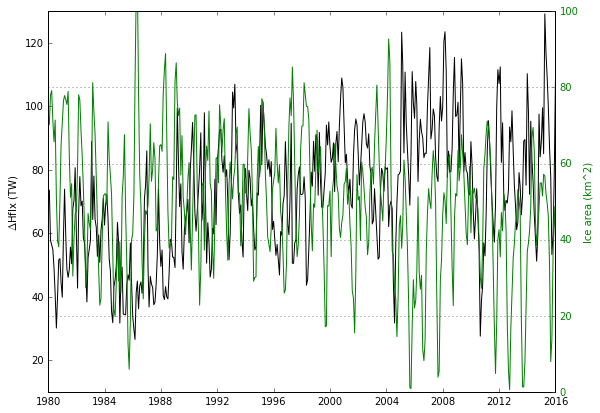

In [55]:

plt.figure(figsize=(20,15))

ax=plt.subplot(223) ; ax2=plt.twinx()
ax.plot(ds_read['time'],ds_read['Ref_FraWSC_S-X_Hflx_ano'],'k')
ax.set_ylabel(r'$\Delta$Hflx (TW)')
ax.set_ylim([10.,130.])
ax.set_xlim(str(s_year),str(e_year+1))
plt.grid(True)

col2,=ax2.plot(ds_read['time'],ds_read['Ref_Icearea_FraWSC_meanTiSe'],'g')
ax2.set_ylim([0.,100.])
ax2.set_ylabel(r'Ice area (km^2)')

ax2.yaxis.label.set_color(col2.get_color())
ax2.tick_params(axis='y', colors=col2.get_color())


## Smoothing step of time-series

########
CAUTION
########
In smoothing the signal with a 12 months window, we remove all hihger frequencies below 12 months.  
The results is that each resulting point is a mixture of 6 points after and before. 
Finaly if we compute lag correlations, they will be quite high over almost all lags in the range [-6 6] months BUT without usefull meaning   

In [56]:
# Apply a 12 months smoothing of monthly data

# First transform the dataset into a Pandas dataframe
data_read=ds_read.to_dataframe()
#data_read
# Apply the rolling mean over 12 months
data_rolmean=data_read.rolling(12,center=True).mean()


In [57]:
data_rolmean

,Ref_Qt_FraWSC_meanTiSe,Ref_AWTmax_FraWSC_meanTiSe,Ref_Icearea_FraWSC_meanTiSe,Ref_massflx_TiSe_nFraWSC,Ref_SS_FraWSC_Hflx_TiSe,Ref_NS_FraWSC_Hflx_TiSe,Ref_XS_FraWSC_Hflx_TiSe,Ref_SS_FraWSC_Vol_TiSe,Ref_NS_FraWSC_Vol_TiSe,Ref_XS_FraWSC_Vol_TiSe,Ref_FraWSC_S-N_Hflx_ano,Ref_FraWSC_S-X_Hflx_ano,Ref_Qtdxdy_FraWSC_meanTiSe
time,,,,,,,,,,,,,
1980-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-07-31,-114.752699,2.873903,62.549679,-2.162943e+07,61.679837,10.542583,12.478291,4.450658,1.162594,1.722772,51.137254,49.201547,-2.234617e+13
1980-08-31,-121.706200,2.850069,63.068071,-2.366150e+07,61.116435,10.285601,13.098474,4.456431,1.172036,1.839543,50.830834,48.017961,-2.370025e+13
1980-09-30,-120.528508,2.827646,63.059196,-2.401426e+07,63.528861,11.304334,14.167332,4.630057,1.333272,2.032854,52.224526,49.361529,-2.347091e+13


In [58]:
ds_read

<xarray.Dataset>
Dimensions:                      (time: 432)
Coordinates:
  * time                         (time) datetime64[ns] 1980-01-31 ... 2015-12-31
Data variables:
    Ref_Qt_FraWSC_meanTiSe       (time) float64 -232.5 -233.2 ... -237.9 -299.9
    Ref_AWTmax_FraWSC_meanTiSe   (time) float64 2.566 2.445 2.367 ... 3.983 3.52
    Ref_Icearea_FraWSC_meanTiSe  (time) float64 70.28 77.96 79.19 ... 48.7 39.94
    Ref_massflx_TiSe_nFraWSC     (time) float64 -2.334e+07 ... -1.458e+07
    Ref_SS_FraWSC_Hflx_TiSe      (time) float64 87.67 67.91 ... 92.28 127.8
    Ref_NS_FraWSC_Hflx_TiSe      (time) float64 26.79 10.88 ... 7.595 24.21
    Ref_XS_FraWSC_Hflx_TiSe      (time) float64 14.09 10.12 ... 14.08 19.67
    Ref_SS_FraWSC_Vol_TiSe       (time) float64 5.901 4.881 5.463 ... 5.26 6.99
    Ref_NS_FraWSC_Vol_TiSe       (time) float64 2.925 1.138 ... 0.1342 1.649
    Ref_XS_FraWSC_Vol_TiSe       (time) float64 1.718 1.204 ... 1.241 1.812
    Ref_FraWSC_S-N_Hflx_ano      (time) float64 60.

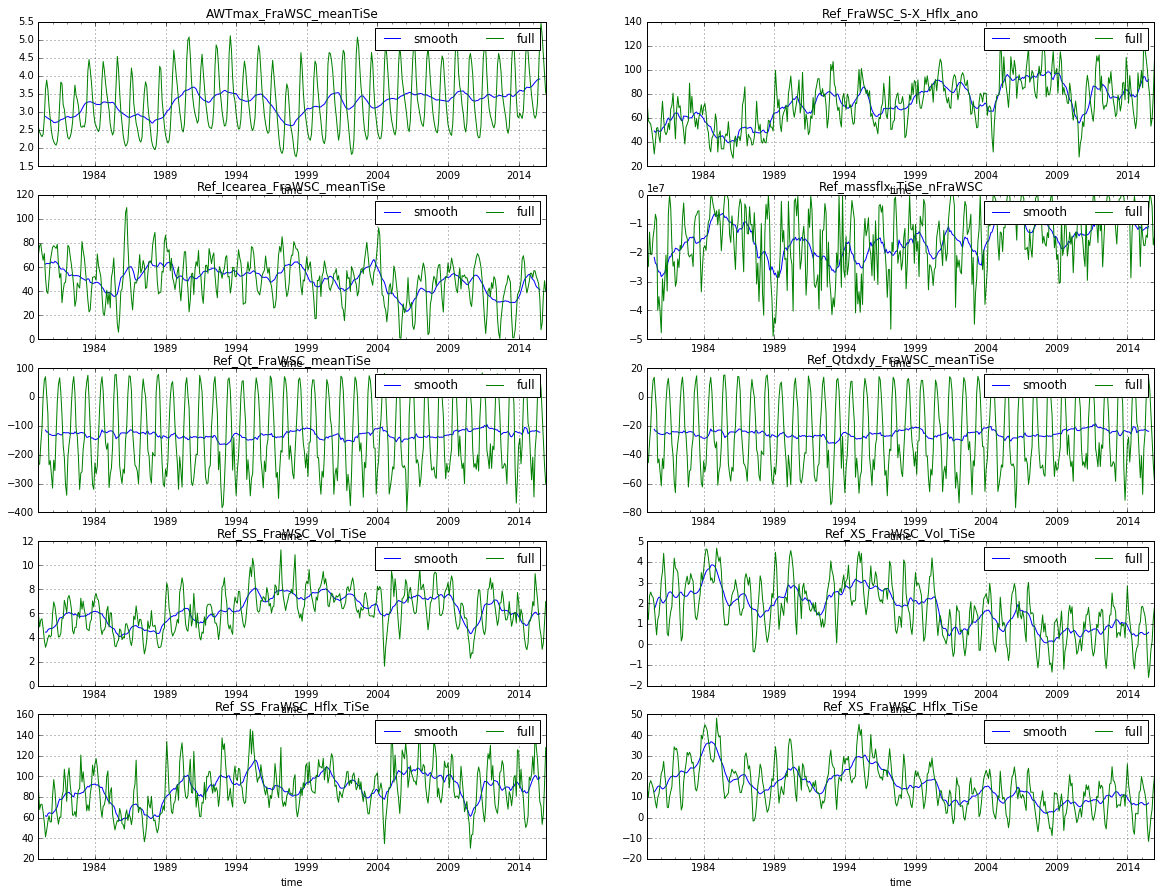

In [59]:
plt.figure(figsize=(20,15))

plt.subplot(521)
data_rolmean['Ref_AWTmax_FraWSC_meanTiSe'].plot(label='smooth')
data_read['Ref_AWTmax_FraWSC_meanTiSe'].plot(color='g',label='full')
plt.title('AWTmax_FraWSC_meanTiSe')
plt.legend(ncol=2)
plt.grid(True)

plt.subplot(522)
data_rolmean['Ref_FraWSC_S-X_Hflx_ano'].plot(label='smooth')
data_read['Ref_FraWSC_S-X_Hflx_ano'].plot(color='g',label='full')
plt.title('Ref_FraWSC_S-X_Hflx_ano')
plt.legend(ncol=2)
plt.grid(True)

plt.subplot(523)
data_rolmean['Ref_Icearea_FraWSC_meanTiSe'].plot(label='smooth')
data_read['Ref_Icearea_FraWSC_meanTiSe'].plot(color='g',label='full')
plt.title('Ref_Icearea_FraWSC_meanTiSe')
plt.legend(ncol=2)
plt.grid(True)

plt.subplot(524)
data_rolmean['Ref_massflx_TiSe_nFraWSC'].plot(label='smooth')
data_read['Ref_massflx_TiSe_nFraWSC'].plot(color='g',label='full')
plt.title('Ref_massflx_TiSe_nFraWSC')
plt.legend(ncol=2)
plt.grid(True)

plt.subplot(525)
data_rolmean['Ref_Qt_FraWSC_meanTiSe'].plot(label='smooth')
data_read['Ref_Qt_FraWSC_meanTiSe'].plot(color='g',label='full')
plt.title('Ref_Qt_FraWSC_meanTiSe')
plt.legend(ncol=2)
plt.grid(True)

plt.subplot(526)
(data_rolmean['Ref_Qtdxdy_FraWSC_meanTiSe']*1e-12).plot(label='smooth')
(data_read['Ref_Qtdxdy_FraWSC_meanTiSe']*1e-12).plot(color='g',label='full')
plt.title('Ref_Qtdxdy_FraWSC_meanTiSe')
plt.legend(ncol=2)
plt.grid(True)


plt.subplot(527)
data_rolmean['Ref_SS_FraWSC_Vol_TiSe'].plot(label='smooth')
data_read['Ref_SS_FraWSC_Vol_TiSe'].plot(color='g',label='full')
plt.title('Ref_SS_FraWSC_Vol_TiSe')
plt.legend(ncol=2)
plt.grid(True)

plt.subplot(528)
data_rolmean['Ref_XS_FraWSC_Vol_TiSe'].plot(label='smooth')
data_read['Ref_XS_FraWSC_Vol_TiSe'].plot(color='g',label='full')
plt.title('Ref_XS_FraWSC_Vol_TiSe')
plt.legend(ncol=2)
plt.grid(True)

plt.subplot(5,2,9)
data_rolmean['Ref_SS_FraWSC_Hflx_TiSe'].plot(label='smooth')
data_read['Ref_SS_FraWSC_Hflx_TiSe'].plot(color='g',label='full')
plt.title('Ref_SS_FraWSC_Hflx_TiSe')
plt.legend(ncol=2)
plt.grid(True)

plt.subplot(5,2,10)
data_rolmean['Ref_XS_FraWSC_Hflx_TiSe'].plot(label='smooth')
data_read['Ref_XS_FraWSC_Hflx_TiSe'].plot(color='g',label='full')
plt.title('Ref_XS_FraWSC_Hflx_TiSe')
plt.legend(ncol=2)
plt.grid(True)


plt.savefig('./FIGURES/'+case_Ref+'_y'+RYEAR+'_TiSe_LargeFraWSC_NOSmooth_DHflx_vs_Qt_IceArea_AWTmax_Massflx_ShtFlx_NHFlx.pdf')


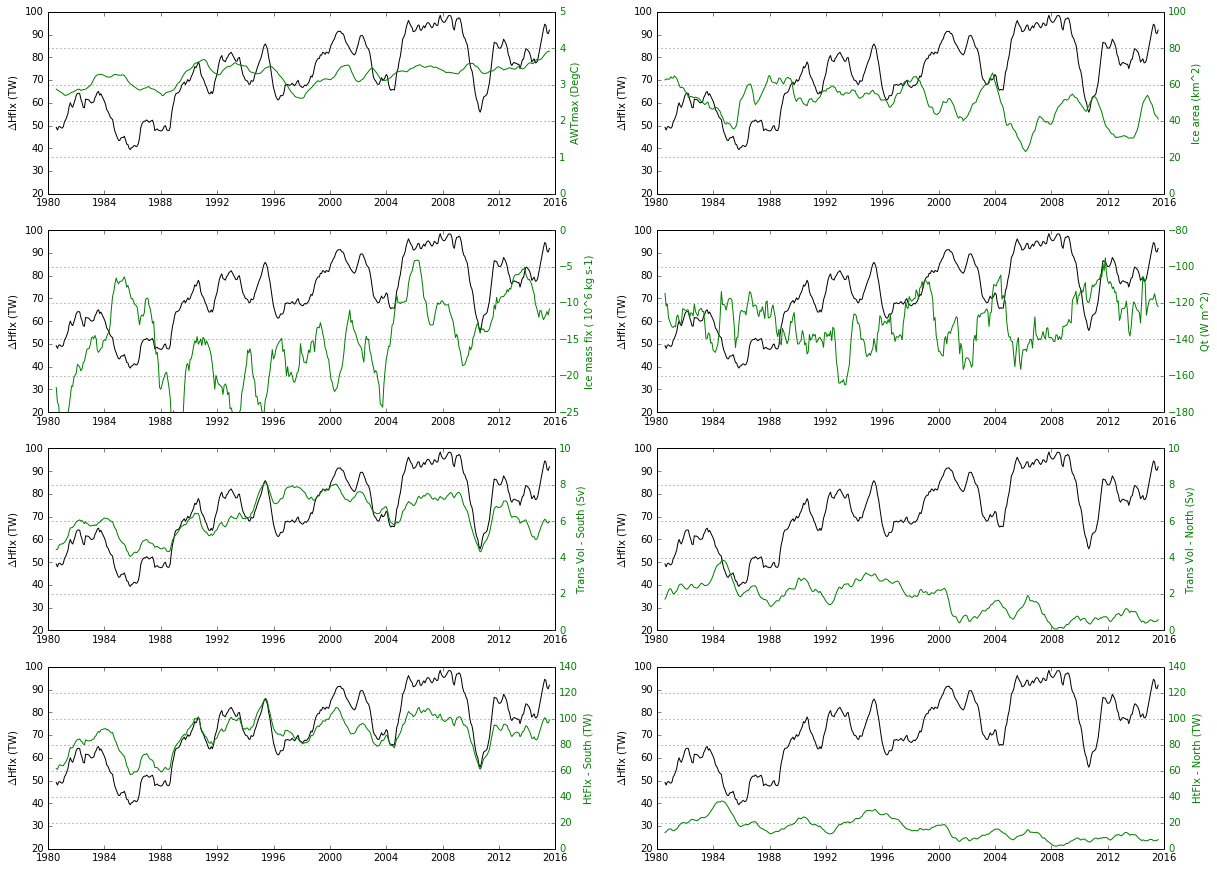

In [60]:
plt.figure(figsize=(20,15))

ax=plt.subplot(421) ; ax2=plt.twinx()
ax.plot(ds_read['time'],data_rolmean['Ref_FraWSC_S-X_Hflx_ano'],'k')
ax.set_ylabel(r'$\Delta$Hflx (TW)')
ax.set_ylim([20.,100.])
ax.set_xlim(str(s_year),str(e_year+1))
plt.grid(True)

col2,=ax2.plot(ds_read['time'],data_rolmean['Ref_AWTmax_FraWSC_meanTiSe'],'g')
ax2.set_ylim([0.,5.])
ax2.set_ylabel(r'AWTmax (DegC)')

ax2.yaxis.label.set_color(col2.get_color())
ax2.tick_params(axis='y', colors=col2.get_color())
plt.grid(True)

ax=plt.subplot(422) ; ax2=plt.twinx()
ax.plot(ds_read['time'],data_rolmean['Ref_FraWSC_S-X_Hflx_ano'],'k')
ax.set_ylabel(r'$\Delta$Hflx (TW)')
ax.set_ylim([20.,100.])
ax.set_xlim(str(s_year),str(e_year+1))
plt.grid(True)

col2,=ax2.plot(ds_read['time'],data_rolmean['Ref_Icearea_FraWSC_meanTiSe'],'g')
ax2.set_ylim([0.,100.])
ax2.set_ylabel(r'Ice area (km^2)')

ax2.yaxis.label.set_color(col2.get_color())
ax2.tick_params(axis='y', colors=col2.get_color())


ax=plt.subplot(423) ; ax2=plt.twinx()
ax.plot(ds_read['time'],data_rolmean['Ref_FraWSC_S-X_Hflx_ano'],'k')
ax.set_ylabel(r'$\Delta$Hflx (TW)')
ax.set_ylim([20.,100.])
ax.set_xlim(str(s_year),str(e_year+1))
plt.grid(True)

col2,=ax2.plot(ds_read['time'],data_rolmean['Ref_massflx_TiSe_nFraWSC']*1e-6,'g')
ax2.set_ylim([-25.,0.])
ax2.set_ylabel(r'Ice mass flx ( 10^6 kg s-1)')

ax2.yaxis.label.set_color(col2.get_color())
ax2.tick_params(axis='y', colors=col2.get_color())


ax=plt.subplot(424) ; ax2=plt.twinx()
ax.plot(ds_read['time'],data_rolmean['Ref_FraWSC_S-X_Hflx_ano'],'k')
ax.set_ylabel(r'$\Delta$Hflx (TW)')
ax.set_ylim([20.,100.])
ax.set_xlim(str(s_year),str(e_year+1))
plt.grid(True)

col2,=ax2.plot(ds_read['time'],data_rolmean['Ref_Qt_FraWSC_meanTiSe'],'g')
ax2.set_ylim([-180.,-80.])
ax2.set_ylabel(r'Qt (W m^2)')

ax2.yaxis.label.set_color(col2.get_color())
ax2.tick_params(axis='y', colors=col2.get_color())

ax=plt.subplot(425) ; ax2=plt.twinx()
ax.plot(ds_read['time'],data_rolmean['Ref_FraWSC_S-X_Hflx_ano'],'k')
ax.set_ylabel(r'$\Delta$Hflx (TW)')
ax.set_ylim([20.,100.])
ax.set_xlim(str(s_year),str(e_year+1))
plt.grid(True)

col2,=ax2.plot(ds_read['time'],data_rolmean['Ref_SS_FraWSC_Vol_TiSe'],'g')
ax2.set_ylim([0.,10.])
ax2.set_ylabel(r'Trans Vol - South (Sv)')

ax2.yaxis.label.set_color(col2.get_color())
ax2.tick_params(axis='y', colors=col2.get_color())


ax=plt.subplot(426) ; ax2=plt.twinx()
ax.plot(ds_read['time'],data_rolmean['Ref_FraWSC_S-X_Hflx_ano'],'k')
ax.set_ylabel(r'$\Delta$Hflx (TW)')
ax.set_ylim([20.,100.])
ax.set_xlim(str(s_year),str(e_year+1))
plt.grid(True)

col2,=ax2.plot(ds_read['time'],data_rolmean['Ref_XS_FraWSC_Vol_TiSe'],'g')
ax2.set_ylim([0.,10.])
ax2.set_ylabel(r'Trans Vol - North (Sv)')

ax2.yaxis.label.set_color(col2.get_color())
ax2.tick_params(axis='y', colors=col2.get_color())


ax=plt.subplot(427) ; ax2=plt.twinx()
ax.plot(ds_read['time'],data_rolmean['Ref_FraWSC_S-X_Hflx_ano'],'k')
ax.set_ylabel(r'$\Delta$Hflx (TW)')
ax.set_ylim([20.,100.])
ax.set_xlim(str(s_year),str(e_year+1))
plt.grid(True)

col2,=ax2.plot(ds_read['time'],data_rolmean['Ref_SS_FraWSC_Hflx_TiSe'],'g')
ax2.set_ylim([0.,140.])
ax2.set_ylabel(r'HtFlx - South (TW)')

ax2.yaxis.label.set_color(col2.get_color())
ax2.tick_params(axis='y', colors=col2.get_color())


ax=plt.subplot(428) ; ax2=plt.twinx()
ax.plot(ds_read['time'],data_rolmean['Ref_FraWSC_S-X_Hflx_ano'],'k')
ax.set_ylabel(r'$\Delta$Hflx (TW)')
ax.set_ylim([20.,100.])
ax.set_xlim(str(s_year),str(e_year+1))
plt.grid(True)

col2,=ax2.plot(ds_read['time'],data_rolmean['Ref_XS_FraWSC_Hflx_TiSe'],'g')
ax2.set_ylim([0.,140.])
ax2.set_ylabel(r'HtFlx - North (TW)')

ax2.yaxis.label.set_color(col2.get_color())
ax2.tick_params(axis='y', colors=col2.get_color())



plt.savefig('./FIGURES/'+case_Ref+'_y'+RYEAR+'_TiSe_LargeFraWSC_12mSmooth_DHflx_vs_Qt_IceArea_AWTmax_Massflx_ShtFlx_NHFlx.pdf')

In [61]:
# Compute the correlation on the same overlap period
NDHflx_QSurnet_Cor=np.corrcoef(data_rolmean['Ref_FraWSC_S-X_Hflx_ano'][6:-5],data_rolmean['Ref_Qt_FraWSC_meanTiSe'][6:-5])
NDHflx_IceArea_Cor=np.corrcoef(data_rolmean['Ref_FraWSC_S-X_Hflx_ano'][6:-5],data_rolmean['Ref_Icearea_FraWSC_meanTiSe'][6:-5])
NDHflx_AWTmax_Cor=np.corrcoef(data_rolmean['Ref_FraWSC_S-X_Hflx_ano'][6:-5],data_rolmean['Ref_AWTmax_FraWSC_meanTiSe'][6:-5])
NDHflx_IceMflx_Cor=np.corrcoef(data_rolmean['Ref_FraWSC_S-X_Hflx_ano'][6:-5],data_rolmean['Ref_massflx_TiSe_nFraWSC'][6:-5])
NDHflx_SVol_Cor=np.corrcoef(data_rolmean['Ref_FraWSC_S-X_Hflx_ano'][6:-5],data_rolmean['Ref_SS_FraWSC_Vol_TiSe'][6:-5])
NDHflx_NVol_Cor=np.corrcoef(data_rolmean['Ref_FraWSC_S-X_Hflx_ano'][6:-5],data_rolmean['Ref_XS_FraWSC_Vol_TiSe'][6:-5])
NDHflx_SHtFlx_Cor=np.corrcoef(data_rolmean['Ref_FraWSC_S-X_Hflx_ano'][6:-5],data_rolmean['Ref_SS_FraWSC_Hflx_TiSe'][6:-5])
NDHflx_NHtFlx_Cor=np.corrcoef(data_rolmean['Ref_FraWSC_S-X_Hflx_ano'][6:-5],data_rolmean['Ref_XS_FraWSC_Hflx_TiSe'][6:-5])

# Re-Compute the correlation on the same overlap period
# The follwing correlation computation is just an other way to get correlation, but it gives also the p-value

NDHflx_QSurnet_CorSci=scipy.stats.pearsonr(data_rolmean['Ref_FraWSC_S-X_Hflx_ano'][6:-5],data_rolmean['Ref_Qt_FraWSC_meanTiSe'][6:-5])
NDHflx_IceArea_CorSci=scipy.stats.pearsonr(data_rolmean['Ref_FraWSC_S-X_Hflx_ano'][6:-5],data_rolmean['Ref_Icearea_FraWSC_meanTiSe'][6:-5])
NDHflx_AWTmax_CorSci=scipy.stats.pearsonr(data_rolmean['Ref_FraWSC_S-X_Hflx_ano'][6:-5],data_rolmean['Ref_AWTmax_FraWSC_meanTiSe'][6:-5])
NDHflx_IceMflx_CorSci=scipy.stats.pearsonr(data_rolmean['Ref_FraWSC_S-X_Hflx_ano'][6:-5],data_rolmean['Ref_massflx_TiSe_nFraWSC'][6:-5])
NDHflx_SVol_CorSci=scipy.stats.pearsonr(data_rolmean['Ref_FraWSC_S-X_Hflx_ano'][6:-5],data_rolmean['Ref_SS_FraWSC_Vol_TiSe'][6:-5])
NDHflx_NVol_CorSci=scipy.stats.pearsonr(data_rolmean['Ref_FraWSC_S-X_Hflx_ano'][6:-5],data_rolmean['Ref_XS_FraWSC_Vol_TiSe'][6:-5])
NDHflx_SHtFlx_CorSci=scipy.stats.pearsonr(data_rolmean['Ref_FraWSC_S-X_Hflx_ano'][6:-5],data_rolmean['Ref_SS_FraWSC_Hflx_TiSe'][6:-5])
NDHflx_NHtFlx_CorSci=scipy.stats.pearsonr(data_rolmean['Ref_FraWSC_S-X_Hflx_ano'][6:-5],data_rolmean['Ref_XS_FraWSC_Hflx_TiSe'][6:-5])


print 'NDHflx_QSurnet_CorSci Corr | p-val:', np.round(NDHflx_QSurnet_CorSci[0],2),' | ', np.round(NDHflx_QSurnet_CorSci[1],4)
print 'NDHflx_IceArea_CorSci Corr | p-val:', np.round(NDHflx_IceArea_CorSci[0],2),' | ', np.round(NDHflx_IceArea_CorSci[1],4)
print 'NDHflx_AWTmax_CorSci  Corr | p-val:', np.round(NDHflx_AWTmax_CorSci[0],2) ,' | ', np.round(NDHflx_AWTmax_CorSci[1],4)
print 'NDHflx_IceMflx_CorSci Corr | p-val:', np.round(NDHflx_IceMflx_CorSci[0],2),' | ', np.round(NDHflx_IceMflx_CorSci[1],4)
print 'NDHflx_SVol_CorSci    Corr | p-val:', np.round(NDHflx_SVol_CorSci[0],2)   ,' | ', np.round(NDHflx_SVol_CorSci[1],4)
print 'NDHflx_NVol_CorSci    Corr | p-val:', np.round(NDHflx_NVol_CorSci[0],2)   ,' | ', np.round(NDHflx_NVol_CorSci[1],4)
print 'NDHflx_SHtFlx_CorSci  Corr | p-val:', np.round(NDHflx_SHtFlx_CorSci[0],2) ,' | ', np.round(NDHflx_SHtFlx_CorSci[1],4)
print 'NDHflx_NHtFlx_CorSci  Corr | p-val:', np.round(NDHflx_NHtFlx_CorSci[0],2) ,' | ', np.round(NDHflx_NHtFlx_CorSci[1],4)

# Compute Correlations between the AWTmax variable and others quantities
DAWTmax_Qt_Cor=np.corrcoef(data_rolmean['Ref_AWTmax_FraWSC_meanTiSe'][6:-5],data_rolmean['Ref_Qt_FraWSC_meanTiSe'][6:-5])
DAWTmax_IceArea_Cor=np.corrcoef(data_rolmean['Ref_AWTmax_FraWSC_meanTiSe'][6:-5],data_rolmean['Ref_Icearea_FraWSC_meanTiSe'][6:-5])

DAWTmax_Qt_CorSci=scipy.stats.pearsonr(data_rolmean['Ref_AWTmax_FraWSC_meanTiSe'][6:-5],data_rolmean['Ref_Qt_FraWSC_meanTiSe'][6:-5])
DAWTmax_IceArea_CorSci=scipy.stats.pearsonr(data_rolmean['Ref_AWTmax_FraWSC_meanTiSe'][6:-5],data_rolmean['Ref_Icearea_FraWSC_meanTiSe'][6:-5])

print
print 'DAWTmax_Qt_CorSci  Corr | p-val:', np.round(DAWTmax_Qt_CorSci[0],2) ,' | ', np.round(DAWTmax_Qt_CorSci[1],4)
print 'DAWTmax_IceArea_CorSci Corr | p-val:', np.round(DAWTmax_IceArea_CorSci[0],2),' | ', np.round(DAWTmax_IceArea_CorSci[1],4)



NDHflx_QSurnet_CorSci Corr | p-val: -0.25  |  0.0
NDHflx_IceArea_CorSci Corr | p-val: -0.44  |  0.0
NDHflx_AWTmax_CorSci  Corr | p-val: 0.61  |  0.0
NDHflx_IceMflx_CorSci Corr | p-val: 0.18  |  0.0002
NDHflx_SVol_CorSci    Corr | p-val: 0.73  |  0.0
NDHflx_NVol_CorSci    Corr | p-val: -0.53  |  0.0
NDHflx_SHtFlx_CorSci  Corr | p-val: 0.86  |  0.0
NDHflx_NHtFlx_CorSci  Corr | p-val: -0.52  |  0.0

DAWTmax_Qt_CorSci  Corr | p-val: -0.15  |  0.0022
DAWTmax_IceArea_CorSci Corr | p-val: -0.52  |  0.0


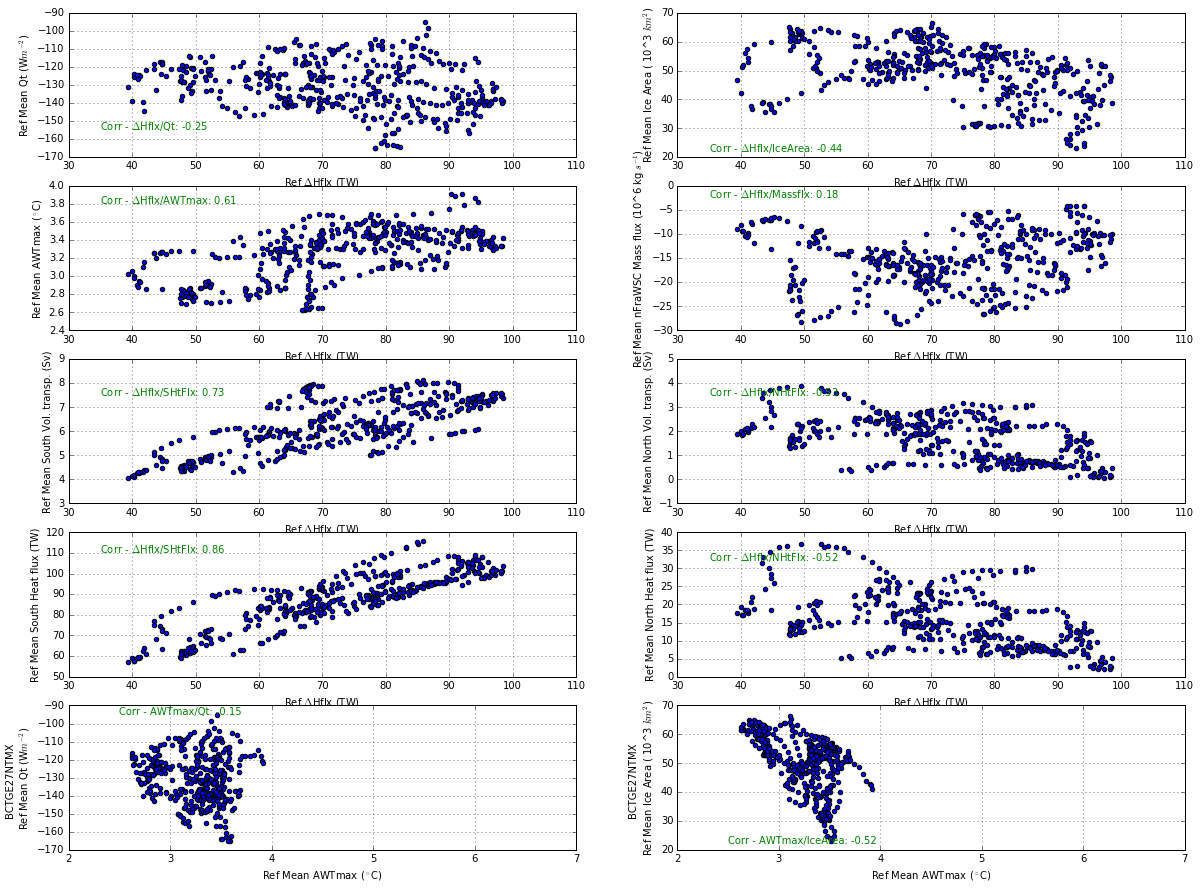

In [66]:
# Scatter plot between ∆Hflx and QSurnet
plt.figure(figsize=(20,15))

if case_Ref == 'BVHNTMXP' : 
    xtext=35.
    if s_year == 1960 : xtext=20.
if case_Ref == 'BVHNTMXD' : 
    xtext=35.
    if s_year == 1960: xtext=10.
if case_Ref == 'BCTGE27NTMX' : 
    xtext=35.
    if s_year == 1960: xtext=15.
if case_Ref == 'BCTGR273' : 
    xtext=10.
    if s_year ==1960: xtext=10.
  
    
plt.subplot(521) 
plt.scatter(data_rolmean['Ref_FraWSC_S-X_Hflx_ano'],data_rolmean['Ref_Qt_FraWSC_meanTiSe'])
plt.xlabel(r'Ref $\Delta$Hflx (TW)')
plt.ylabel(r'Ref Mean Qt (W$m^{-2}$)')

plt.text(xtext,-155.,r'Corr - $\Delta$Hflx/Qt: '+str(np.round(NDHflx_QSurnet_Cor[1][0],2)),color=pval_test(NDHflx_QSurnet_CorSci[1],ralpha))
plt.grid(True)

# Scatter plot between ∆Hflx and Icearea
plt.subplot(522) 
plt.scatter(data_rolmean['Ref_FraWSC_S-X_Hflx_ano'],data_rolmean['Ref_Icearea_FraWSC_meanTiSe'])
plt.xlabel(r'Ref $\Delta$Hflx (TW)')
plt.ylabel(r'Ref Mean Ice Area ( 10^3 $km^{2}$)')

plt.text(xtext,22.,r'Corr - $\Delta$Hflx/IceArea: '+str(np.round(NDHflx_IceArea_Cor[1][0],2)),color=pval_test(NDHflx_IceArea_CorSci[1],ralpha))
plt.grid(True)

# Scatter plot between ∆Hflx and AWTmax
plt.subplot(523) 
plt.scatter(data_rolmean['Ref_FraWSC_S-X_Hflx_ano'],data_rolmean['Ref_AWTmax_FraWSC_meanTiSe'])
plt.xlabel(r'Ref $\Delta$Hflx (TW)')
plt.ylabel(r'Ref Mean AWTmax ($^\circ$C)')

plt.text(xtext,3.8,r'Corr - $\Delta$Hflx/AWTmax: '+str(np.round(NDHflx_AWTmax_Cor[1][0],2)),color=pval_test(NDHflx_AWTmax_CorSci[1],ralpha))
plt.grid(True)

# Scatter plot between ∆Hflx and Massflux
plt.subplot(524) 
plt.scatter(data_rolmean['Ref_FraWSC_S-X_Hflx_ano'],data_rolmean['Ref_massflx_TiSe_nFraWSC']*1e-6)
plt.xlabel(r'Ref $\Delta$Hflx (TW)')
plt.ylabel(r'Ref Mean nFraWSC Mass flux (10^6 kg $s^{-1}$)')
plt.text(xtext,-2.5,r'Corr - $\Delta$Hflx/Massflx: '+str(np.round(NDHflx_IceMflx_Cor[1][0],2)),color=pval_test(NDHflx_IceMflx_CorSci[1],ralpha))
plt.grid(True)

# Scatter plot between ∆Hflx and Southern Volume tranport
plt.subplot(525) 
plt.scatter(data_rolmean['Ref_FraWSC_S-X_Hflx_ano'],data_rolmean['Ref_SS_FraWSC_Vol_TiSe'])
plt.xlabel(r'Ref $\Delta$Hflx (TW)')
plt.ylabel(r'Ref Mean South Vol. transp. (Sv)')
plt.text(xtext,7.5,r'Corr - $\Delta$Hflx/SHtFlx: '+str(np.round(NDHflx_SVol_Cor[1][0],2)),color=pval_test(NDHflx_SVol_CorSci[1],ralpha))
plt.grid(True)

# Scatter plot between ∆Hflx and Northern Volume tranport
plt.subplot(526) 
plt.scatter(data_rolmean['Ref_FraWSC_S-X_Hflx_ano'],data_rolmean['Ref_XS_FraWSC_Vol_TiSe'])
plt.xlabel(r'Ref $\Delta$Hflx (TW)')
plt.ylabel(r'Ref Mean North Vol. transp. (Sv)')
if case_Ref == 'BVHNTMXD' :     ytext=3.5
if case_Ref == 'BVHNTMXP' :     ytext=3.5
if case_Ref == 'BCTGE27NTMX' :  ytext=4.5
    
plt.text(xtext,ytext,r'Corr - $\Delta$Hflx/NHtFlx: '+str(np.round(NDHflx_NVol_Cor[1][0],2)),color=pval_test(NDHflx_NVol_CorSci[1],ralpha))
plt.grid(True)

# Scatter plot between ∆Hflx and Southern Heat flux
plt.subplot(527) 
plt.scatter(data_rolmean['Ref_FraWSC_S-X_Hflx_ano'],data_rolmean['Ref_SS_FraWSC_Hflx_TiSe'])
plt.xlabel(r'Ref $\Delta$Hflx (TW)')
plt.ylabel(r'Ref Mean South Heat flux (TW)')
plt.text(xtext,110.,r'Corr - $\Delta$Hflx/SHtFlx: '+str(np.round(NDHflx_SHtFlx_Cor[1][0],2)),color=pval_test(NDHflx_SHtFlx_CorSci[1],ralpha))
plt.grid(True)

# Scatter plot between ∆Hflx and Northern Heat flux
plt.subplot(528) 
plt.scatter(data_rolmean['Ref_FraWSC_S-X_Hflx_ano'],data_rolmean['Ref_XS_FraWSC_Hflx_TiSe'])
plt.xlabel(r'Ref $\Delta$Hflx (TW)')
plt.ylabel(r'Ref Mean North Heat flux (TW)')
plt.text(xtext,32.,r'Corr - $\Delta$Hflx/NHtFlx: '+str(np.round(NDHflx_NHtFlx_Cor[1][0],2)),color=pval_test(NDHflx_NHtFlx_CorSci[1],ralpha))
plt.grid(True)

xtext=2.5
# Scatter plot between AWTmax & Qt
plt.subplot(529) 
plt.scatter(data_rolmean['Ref_AWTmax_FraWSC_meanTiSe'],data_rolmean['Ref_Qt_FraWSC_meanTiSe'])
plt.xlabel(r'Ref Mean AWTmax ($^\circ$C)')
plt.ylabel(case_Ref+' '+' \n'+r'Ref Mean Qt (W$m^{-2}$)')
plt.xlim([2.,7.])
if case_Ref == 'BVHNTMXD' :     ytext=-90.
if case_Ref == 'BVHNTMXP' :     ytext=-95.
if case_Ref == 'BCTGE27NTMX' :  ytext=-95.
plt.text(xtext,ytext,r'Corr - AWTmax/Qt: '+str(np.round(DAWTmax_Qt_Cor[1][0],2)),color=pval_test(DAWTmax_Qt_CorSci[1],ralpha))
plt.grid(True)

# Scatter plot between AWTmax & Icearea
plt.subplot(5,2,10) 
plt.scatter(data_rolmean['Ref_AWTmax_FraWSC_meanTiSe'],data_rolmean['Ref_Icearea_FraWSC_meanTiSe'])
plt.xlabel(r'Ref Mean AWTmax ($^\circ$C)')
plt.xlim([2.,7.])
plt.ylabel(case_Ref+' '+' \n'+r'Ref Mean Ice Area ( 10^3 $km^{2}$)')
if case_Ref == 'BVHNTMXD' :     ytext=22.
if case_Ref == 'BVHNTMXP' :     ytext=32.
if case_Ref == 'BCTGE27NTMX' :  ytext=22.

plt.text(xtext,ytext,r'Corr - AWTmax/IceArea: '+str(np.round(DAWTmax_IceArea_Cor[1][0],2)),color=pval_test(DAWTmax_IceArea_CorSci[1],ralpha))
plt.grid(True)


plt.savefig('./FIGURES/'+case_Ref+'_y'+RYEAR+'_Lag0Corr_LargeFraWSC_12mSmooth_DHflx_vs_Qt_IceArea_AWTmax_Massflx_ShtFlx_NHFlx.pdf')


In [63]:
# an other way to test the significance of the correlation

#dof=len(data_rolmean['Ref_FraWSC_Hflx_ano'])-11
#T_theo=scipy.stats.t.ppf(1.-ralpha ,dof)

# T=r/[ (1-r^2)/(n-2) ]^1/2 to compare to the theoritical value
#T_comp=NDHflx_QSurnet_CorSci[0]/np.sqrt( (1-NDHflx_QSurnet_CorSci[0]**2)/(len(data_rolmean['Ref_FraWSC_Hflx_ano'])-11-2) )
                   
#print np.abs(T_comp), 'against theoritical value of', T_theo

In [64]:
# Compute the Max correlation and associated Lag
## MAKE NO SENSE TO DO THIS WITH A SMOOTHED SIGNAL OVER 12 MONTHS

In [65]:
plot_lagCorr=False
if plot_lagCorr:
    plt.figure(figsize=(20,15))

    sel_maxlags=12

    plt.subplot(221)
    lags_corr=plt.xcorr(data_rolmean['Ref_FraWSC_S-X_Hflx_ano'][6:-5],data_rolmean['Ref_Qt_FraWSC_meanTiSe'][6:-5],maxlags=sel_maxlags)
    HflxQt_lag=lags_corr[0][lags_corr[1][:].argmin()]
    HflxQt_Cor=lags_corr[1][:].min()
    plt.ylim([-1.,0.])
    plt.title('Hflx .vs. Qt \n'+ 'Max correlation lag')
    str_HflxQt_Cor=str(np.round(HflxQt_Cor,2))
    str_HflxQt_lag=str(HflxQt_lag)
    plt.text(-5.,-0.9,'Max. Corr:'+str_HflxQt_Cor+' - lag: '+str_HflxQt_lag+' months')
    plt.grid(True)
    lags_corr[0][:] ; lags_corr[1][:]

    plt.subplot(222)
    lags_corr=plt.xcorr(data_rolmean['Ref_FraWSC_S-X_Hflx_ano'][6:-5],data_rolmean['Ref_Icearea_FraWSC_meanTiSe'][6:-5],maxlags=sel_maxlags)
    HflxIceArea_lag=lags_corr[0][lags_corr[1][:].argmin()]
    HflxIceArea_Cor=lags_corr[1][:].min()
    plt.ylim([-1.,0.])
    plt.title('Hflx .vs. Ice Area \n'+ 'Max correlation lag')
    str_HflxIceArea_Cor=str(np.round(HflxIceArea_Cor,2))
    str_HflxIceArea_lag=str(HflxIceArea_lag)
    plt.text(-5.,-0.9,'Max. Corr:'+str_HflxIceArea_Cor+' - lag: '+str_HflxIceArea_lag+' months')
    plt.grid(True)

    lags_corr[0][:] ; lags_corr[1][:]

    plt.subplot(223)
    lags_corr=plt.xcorr(data_rolmean['Ref_FraWSC_S-X_Hflx_ano'][6:-5],data_rolmean['Ref_AWTmax_FraWSC_meanTiSe'][6:-5],maxlags=sel_maxlags)
    HflxAWT_lag=lags_corr[0][lags_corr[1][:].argmax()]
    HflxAWT_Cor=lags_corr[1][:].max()
    plt.ylim([0.,1.])
    plt.title('Hflx .vs. AWTmax \n'+ 'Max correlation lag')
    str_HflxAWT_Cor=str(np.round(HflxAWT_Cor,2))
    str_HflxAWT_lag=str(HflxAWT_lag)
    plt.text(-5.,0.9,'Max. Corr:'+str_HflxAWT_Cor+' - lag: '+str_HflxAWT_lag+' months')
    plt.grid(True)
    lags_corr[0][:] #; lags_corr[1][:]

    plt.subplot(224)
    lags_corr=plt.xcorr(data_rolmean['Ref_FraWSC_S-X_Hflx_ano'][6:-5],data_rolmean['Ref_massflx_TiSe_nFraWSC'][6:-5]*1e-6,maxlags=sel_maxlags)
    HflxMassflx_lag=lags_corr[0][lags_corr[1][:].argmax()]
    HflxMassflx_Cor=lags_corr[1][:].max()
    plt.ylim([0.,1.])
    plt.title('Hflx .vs. MassFlx \n'+ 'Max correlation lag')
    str_HflxMassflx_Cor=str(np.round(HflxMassflx_Cor,2))
    str_HflxMassflx_lag=str(HflxMassflx_lag)
    plt.text(-5.,0.9,'Max. Corr:'+str_HflxMassflx_Cor+' - lag: '+str_HflxMassflx_lag+' months')
    plt.grid(True)
    #lags_corr[0][:] #; lags_corr[1][:]


>>>> # The following step is not usefull for the current analysis

# Plots the anomalies against seasonal climatology before computing the correlation

In [188]:
ds_read

<xarray.Dataset>
Dimensions:                               (time: 432)
Coordinates:
  * time                                  (time) datetime64[ns] 1980-01-31 ...
Data variables:
    Ref_Qt_FraWSC_meanTiSe                (time) float64 -280.7 -280.6 ...
    Ref_AWTmax_FraWSC_meanTiSe            (time) float64 2.771 2.516 2.392 ...
    Ref_Icearea_FraWSC_meanTiSe           (time) float64 27.23 36.86 40.39 ...
    Ref_massflx_TiSe_nFraWSC              (time) float64 -1.595e+07 ...
    Ref_SS_FraWSC_Hflx_TiSe               (time) float64 77.21 59.59 68.14 ...
    Ref_NS_FraWSC_Hflx_TiSe               (time) float64 31.53 22.58 24.26 ...
    Ref_SS_FraWSC_Vol_TiSe                (time) float64 6.306 5.325 5.807 ...
    Ref_NS_FraWSC_Vol_TiSe                (time) float64 3.338 2.494 2.765 ...
    Ref_FraWSC_Hflx_ano                   (time) float64 45.68 37.01 43.88 ...
    Ref_Qtdxdy_FraWSC_meanTiSe            (time) float64 -3.664e+13 ...
    Ref_Qt_FraWSC_meanTiSe_SeasClim       (time) 

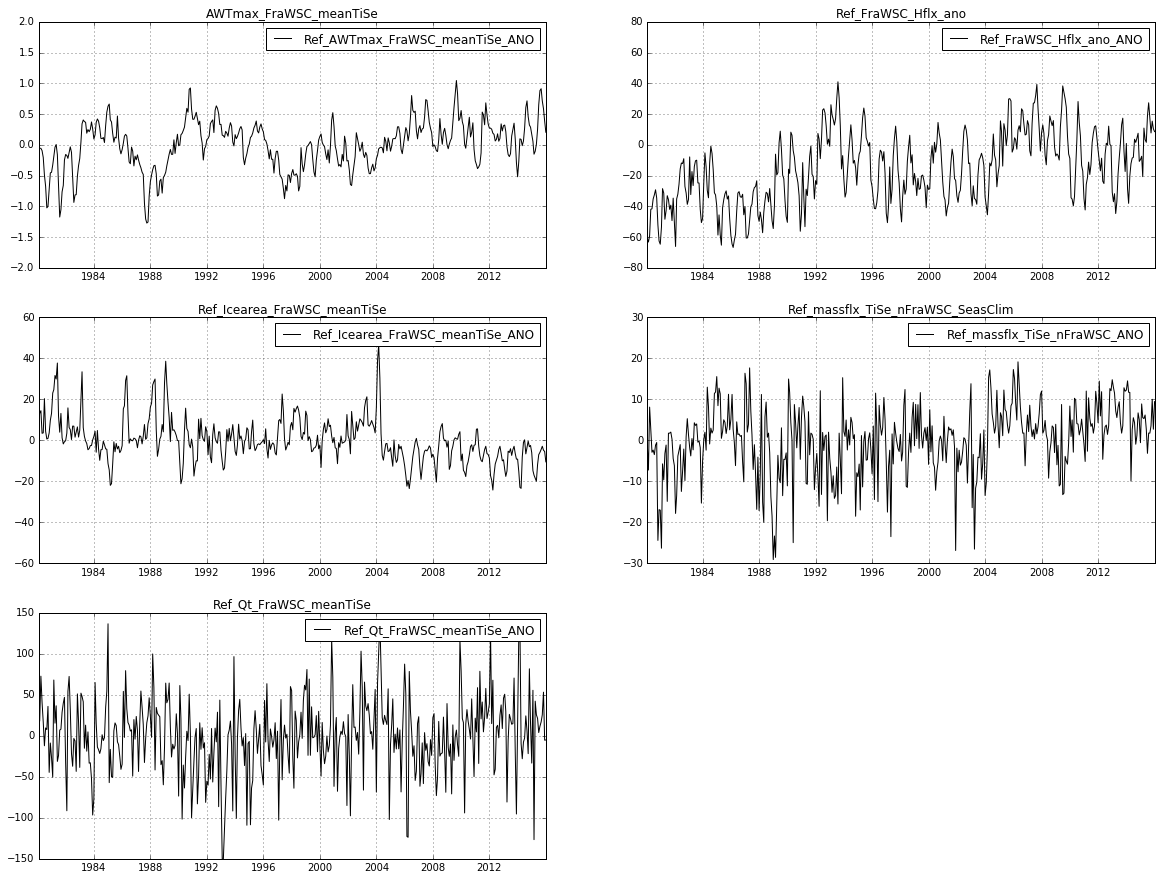

In [189]:
plt.figure(figsize=(20,15))

plt.subplot(321)
#ds_read['Ref_AWTmax_FraWSC_meanTiSe'].plot(label='full')
#ds_read['Ref_AWTmax_FraWSC_meanTiSe_SeasClim'].plot(color='g',label='mean')
ds_read['Ref_AWTmax_FraWSC_meanTiSe_ANO']=ds_read['Ref_AWTmax_FraWSC_meanTiSe']-ds_read['Ref_AWTmax_FraWSC_meanTiSe_SeasClim']
plt.plot(ds_read['time'],ds_read['Ref_AWTmax_FraWSC_meanTiSe_ANO'],'k')
plt.title('AWTmax_FraWSC_meanTiSe')
plt.ylim([-2.,2.])
plt.legend(ncol=2)
plt.grid(True)

plt.subplot(322)
#ds_read['Ref_FraWSC_Hflx_ano'].plot(label='full')
#ds_read['Ref_FraWSC_Hflx_ano_SeasClim'].plot(color='g',label='mean')
ds_read['Ref_FraWSC_Hflx_ano_ANO']=ds_read['Ref_FraWSC_Hflx_ano']-ds_read['Ref_FraWSC_Hflx_ano_SeasClim']
plt.plot(ds_read['time'],ds_read['Ref_FraWSC_Hflx_ano_ANO'],'k')
plt.title('Ref_FraWSC_Hflx_ano')
plt.ylim([-80.,80.])
plt.legend(ncol=2)
plt.grid(True)

plt.subplot(323)
#ds_read['Ref_Icearea_FraWSC_meanTiSe'].plot(label='full')
#ds_read['Ref_Icearea_FraWSC_meanTiSe_SeasClim'].plot(color='g',label='mean')
ds_read['Ref_Icearea_FraWSC_meanTiSe_ANO']=ds_read['Ref_Icearea_FraWSC_meanTiSe']-ds_read['Ref_Icearea_FraWSC_meanTiSe_SeasClim']
plt.plot(ds_read['time'],ds_read['Ref_Icearea_FraWSC_meanTiSe_ANO'],'k')
plt.title('Ref_Icearea_FraWSC_meanTiSe')
plt.ylim([-60.,60.])
plt.legend(ncol=2)
plt.grid(True)


plt.subplot(324)
#ds_read['Ref_massflx_TiSe_nFraWSC'].plot(label='full')
#ds_read['Ref_massflx_TiSe_nFraWSC_SeasClim'].plot(color='g',label='mean')
ds_read['Ref_massflx_TiSe_nFraWSC_ANO']=ds_read['Ref_massflx_TiSe_nFraWSC']-ds_read['Ref_massflx_TiSe_nFraWSC_SeasClim']
plt.plot(ds_read['time'],(ds_read['Ref_massflx_TiSe_nFraWSC_ANO'])*1e-6,'k')
plt.title('Ref_massflx_TiSe_nFraWSC_SeasClim')
plt.ylim([-30.,30.])
plt.legend(ncol=2)
plt.grid(True)

plt.subplot(325)
#ds_read['Ref_Qt_FraWSC_meanTiSe'].plot(label='full')
#ds_read['Ref_Qt_FraWSC_meanTiSe_SeasClim'].plot(color='g',label='mean')
ds_read['Ref_Qt_FraWSC_meanTiSe_ANO']=ds_read['Ref_Qt_FraWSC_meanTiSe']-ds_read['Ref_Qt_FraWSC_meanTiSe_SeasClim']
plt.plot(ds_read['time'],ds_read['Ref_Qt_FraWSC_meanTiSe_ANO'],'k')
plt.title('Ref_Qt_FraWSC_meanTiSe')
plt.ylim([-150.,150.])

plt.legend(ncol=2)
plt.grid(True)


plt.savefig('./FIGURES/'+case_Ref+'_y'+RYEAR+'_TiSe_Anomaly_LargeFraWSC_DHflx_Qt_IceArea_AWTmax_Massflx_ShtFlx_NHFlx.pdf')




In [190]:

# Compute the correlation on the same overlap period
DHflx_QSurnet_ANO_Cor=np.corrcoef(ds_read['Ref_FraWSC_Hflx_ano_ANO'],ds_read['Ref_Qt_FraWSC_meanTiSe_ANO'])
DHflx_IceArea_ANO_Cor=np.corrcoef(ds_read['Ref_FraWSC_Hflx_ano_ANO'],ds_read['Ref_Icearea_FraWSC_meanTiSe_ANO'])
DHflx_AWTmax_ANO_Cor=np.corrcoef(ds_read['Ref_FraWSC_Hflx_ano_ANO'],ds_read['Ref_AWTmax_FraWSC_meanTiSe_ANO'])
DHflx_IceMflx_ANO_Cor=np.corrcoef(ds_read['Ref_FraWSC_Hflx_ano_ANO'],ds_read['Ref_massflx_TiSe_nFraWSC_ANO'])

DHflx_QSurnet_ANO_CorSci=scipy.stats.pearsonr(ds_read['Ref_FraWSC_Hflx_ano_ANO'],ds_read['Ref_Qt_FraWSC_meanTiSe_ANO'])
DHflx_IceArea_ANO_CorSci=scipy.stats.pearsonr(ds_read['Ref_FraWSC_Hflx_ano_ANO'],ds_read['Ref_Icearea_FraWSC_meanTiSe_ANO'])
DHflx_AWTmax_ANO_CorSci=scipy.stats.pearsonr(ds_read['Ref_FraWSC_Hflx_ano_ANO'],ds_read['Ref_AWTmax_FraWSC_meanTiSe_ANO'])
DHflx_IceMflx_ANO_CorSci=scipy.stats.pearsonr(ds_read['Ref_FraWSC_Hflx_ano_ANO'],ds_read['Ref_massflx_TiSe_nFraWSC_ANO'])

print 'DHflx_QSurnet_ANO_CorSci Corr | p-val:', np.round(DHflx_QSurnet_ANO_CorSci[0],2),' | ', np.round(DHflx_QSurnet_ANO_CorSci[1],4)
print 'DHflx_IceArea_ANO_CorSci Corr | p-val:', np.round(DHflx_IceArea_ANO_CorSci[0],2),' | ', np.round(DHflx_IceArea_ANO_CorSci[1],4)
print 'DHflx_AWTmax_ANO_CorSci  Corr | p-val:', np.round(DHflx_AWTmax_ANO_CorSci[0],2) ,' | ', np.round(DHflx_AWTmax_ANO_CorSci[1],4)
print 'DHflx_IceMflx_ANO_CorSci Corr | p-val:', np.round(DHflx_IceMflx_ANO_CorSci[0],2),' | ', np.round(DHflx_IceMflx_ANO_CorSci[1],4)



DHflx_QSurnet_ANO_CorSci Corr | p-val: -0.04  |  0.4203
DHflx_IceArea_ANO_CorSci Corr | p-val: -0.31  |  0.0
DHflx_AWTmax_ANO_CorSci  Corr | p-val: 0.42  |  0.0
DHflx_IceMflx_ANO_CorSci Corr | p-val: 0.12  |  0.015


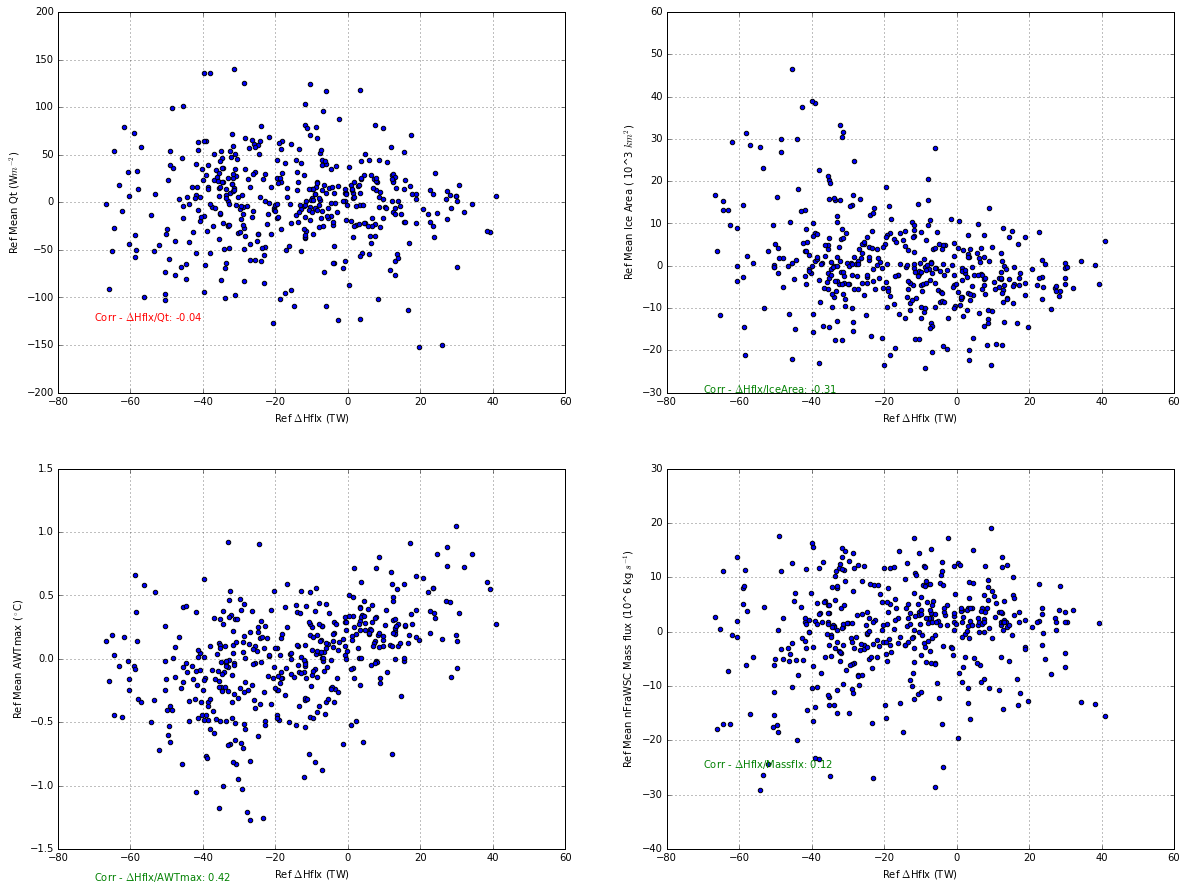

In [194]:
# Scatter plot between ∆Hflx and QSurnet
plt.figure(figsize=(20,15))


if case_Ref == 'BVHNTMXP' : 
    xtext=-70.
    if s_year == 1960 : xtext=-70. 
        
if case_Ref == 'BVHNTMXD' : 
    xtext=-70.
    if s_year == 1960 : xtext=-70.

if case_Ref == 'BCTGE27NTMX' : 
    xtext=-70.
    if s_year == 1960 : xtext=-70.
        
if case_Ref == 'BCTGR273' : 
    if s_year == 1960 : xtext=10.


plt.subplot(221) 
plt.scatter(ds_read['Ref_FraWSC_Hflx_ano_ANO'],ds_read['Ref_Qt_FraWSC_meanTiSe_ANO'])
plt.xlabel(r'Ref $\Delta$Hflx (TW)')
plt.ylabel(r'Ref Mean Qt (W$m^{-2}$)')
plt.text(xtext,-125.,r'Corr - $\Delta$Hflx/Qt: '+str(np.round(DHflx_QSurnet_ANO_Cor[1][0],2)),color=pval_test(DHflx_QSurnet_ANO_CorSci[1],ralpha))
plt.grid(True)

# Scatter plot between ∆Hflx and Icearea
plt.subplot(222) 
plt.scatter(ds_read['Ref_FraWSC_Hflx_ano_ANO'],ds_read['Ref_Icearea_FraWSC_meanTiSe_ANO'])
plt.xlabel(r'Ref $\Delta$Hflx (TW)')
plt.ylabel(r'Ref Mean Ice Area ( 10^3 $km^{2}$)')

plt.text(xtext,-30.,r'Corr - $\Delta$Hflx/IceArea: '+str(np.round(DHflx_IceArea_ANO_Cor[1][0],2)),color=pval_test(DHflx_IceArea_ANO_CorSci[1],ralpha))
plt.grid(True)

# Scatter plot between ∆Hflx and AWTmax
plt.subplot(223) 
plt.scatter(ds_read['Ref_FraWSC_Hflx_ano_ANO'],ds_read['Ref_AWTmax_FraWSC_meanTiSe_ANO'])
plt.xlabel(r'Ref $\Delta$Hflx (TW)')
plt.ylabel(r'Ref Mean AWTmax ($^\circ$C)')

plt.text(xtext,-1.75,r'Corr - $\Delta$Hflx/AWTmax: '+str(np.round(DHflx_AWTmax_ANO_Cor[1][0],2)),color=pval_test(DHflx_AWTmax_ANO_CorSci[1],ralpha))
plt.grid(True)

# Scatter plot between ∆Hflx and Massflux
plt.subplot(224) 
plt.scatter(ds_read['Ref_FraWSC_Hflx_ano_ANO'],ds_read['Ref_massflx_TiSe_nFraWSC_ANO']*1e-6)
plt.xlabel(r'Ref $\Delta$Hflx (TW)')
plt.ylabel(r'Ref Mean nFraWSC Mass flux (10^6 kg $s^{-1}$)')
plt.text(xtext,-25.,r'Corr - $\Delta$Hflx/Massflx: '+str(np.round(DHflx_IceMflx_ANO_Cor[1][0],2)),color=pval_test(DHflx_IceMflx_ANO_CorSci[1],ralpha))
plt.grid(True)

plt.savefig('./FIGURES/'+case_Ref+'_y'+RYEAR+'_Lag0Corr_Anomaly_FraWSC_DHflx_vs_Qt_IceArea_AWTmax_Massflx_ShtFlx_NHFlx.pdf')


### Compute the Max correlation & associated Lag 

array([ 0.11527608,  0.11433597,  0.11192034,  0.14343178,  0.13498201,
        0.12589754,  0.11573602,  0.12273889,  0.10026564,  0.08939804,
        0.08566531,  0.08326101,  0.09651969,  0.03426042,  0.01943739,
       -0.00110347,  0.00350087,  0.00283475,  0.03611983,  0.07519405,
        0.09368714,  0.13087838,  0.12914826,  0.1213672 ,  0.12815798])

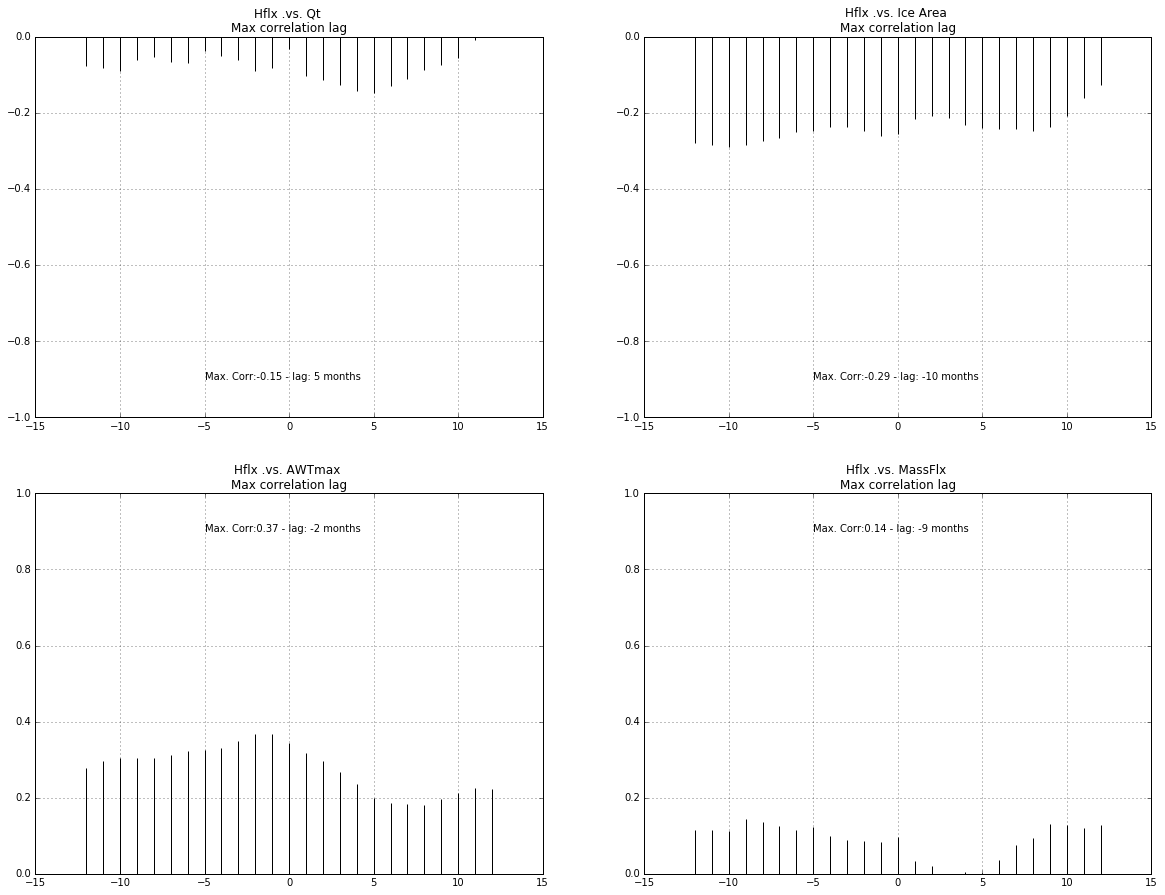

In [192]:
plt.figure(figsize=(20,15))

sel_maxlags=12

plt.subplot(221)
lags_corr=plt.xcorr(ds_read['Ref_FraWSC_Hflx_ano_ANO'],ds_read['Ref_Qt_FraWSC_meanTiSe_ANO'],maxlags=sel_maxlags)
HflxQt_lag=lags_corr[0][lags_corr[1][:].argmin()]
HflxQt_Cor=lags_corr[1][:].min()
plt.ylim([-1.,0.])
plt.title('Hflx .vs. Qt \n'+ 'Max correlation lag')
str_HflxQt_Cor=str(np.round(HflxQt_Cor,2))
str_HflxQt_lag=str(HflxQt_lag)
plt.text(-5.,-0.9,'Max. Corr:'+str_HflxQt_Cor+' - lag: '+str_HflxQt_lag+' months')
plt.grid(True)
lags_corr[0][:] ; lags_corr[1][:]

plt.subplot(222)
lags_corr=plt.xcorr(ds_read['Ref_FraWSC_Hflx_ano_ANO'],ds_read['Ref_Icearea_FraWSC_meanTiSe_ANO'],maxlags=sel_maxlags)
HflxIceArea_lag=lags_corr[0][lags_corr[1][:].argmin()]
HflxIceArea_Cor=lags_corr[1][:].min()
plt.ylim([-1.,0.])
plt.title('Hflx .vs. Ice Area \n'+ 'Max correlation lag')
str_HflxIceArea_Cor=str(np.round(HflxIceArea_Cor,2))
str_HflxIceArea_lag=str(HflxIceArea_lag)
plt.text(-5.,-0.9,'Max. Corr:'+str_HflxIceArea_Cor+' - lag: '+str_HflxIceArea_lag+' months')
plt.grid(True)

lags_corr[0][:] ; lags_corr[1][:]


plt.subplot(223)
lags_corr=plt.xcorr(ds_read['Ref_FraWSC_Hflx_ano_ANO'],ds_read['Ref_AWTmax_FraWSC_meanTiSe_ANO'],maxlags=sel_maxlags)
HflxAWT_lag=lags_corr[0][lags_corr[1][:].argmax()]
HflxAWT_Cor=lags_corr[1][:].max()
plt.ylim([0.,1.])
plt.title('Hflx .vs. AWTmax \n'+ 'Max correlation lag')
str_HflxAWT_Cor=str(np.round(HflxAWT_Cor,2))
str_HflxAWT_lag=str(HflxAWT_lag)
plt.text(-5.,0.9,'Max. Corr:'+str_HflxAWT_Cor+' - lag: '+str_HflxAWT_lag+' months')
plt.grid(True)
lags_corr[0][:] #; lags_corr[1][:]


plt.subplot(224)
lags_corr=plt.xcorr(ds_read['Ref_FraWSC_Hflx_ano_ANO'],ds_read['Ref_massflx_TiSe_nFraWSC_ANO'],maxlags=sel_maxlags)
HflxMassflx_lag=lags_corr[0][lags_corr[1][:].argmax()]
HflxMassflx_Cor=lags_corr[1][:].max()
plt.ylim([0.,1.])
plt.title('Hflx .vs. MassFlx \n'+ 'Max correlation lag')
str_HflxMassflx_Cor=str(np.round(HflxMassflx_Cor,2))
str_HflxMassflx_lag=str(HflxMassflx_lag)
plt.text(-5.,0.9,'Max. Corr:'+str_HflxMassflx_Cor+' - lag: '+str_HflxMassflx_lag+' months')
plt.grid(True)
#lags_corr[0][:] 
lags_corr[1][:]
